In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importamos los datos

In [2]:
clicks = pd.read_csv('clicks.csv.gzip', compression='gzip')

### Muestra de datos

In [3]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


### Columnas con valores nulos

In [4]:
clicks.isnull().any()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id          True
trans_id           False
os_minor            True
agent_device        True
os_major            True
specs_brand        False
brand               True
timeToClick         True
touchX              True
touchY              True
ref_type           False
ref_hash           False
dtype: bool

### Precisamos obtener info detallada de los clicks por país en función de cada cliente de JAMPP

### Verificamos los campos que nos interesan, en función del JSON de descripciones

In [6]:
# internal id for the advertiser, Jampp's client paying for the ad
advertisers = clicks['advertiser_id'].value_counts()
advertisers

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

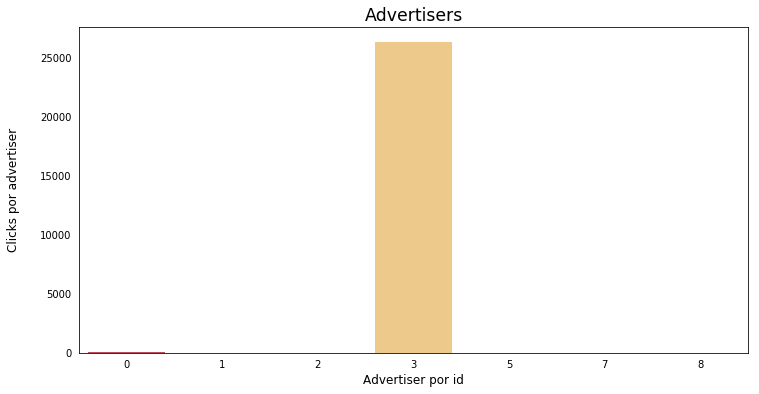

In [13]:
# Analizamos visualmente los advertisers
plt.figure(figsize=(12, 6))
sns.barplot(x = advertisers.index, y = advertisers.values, palette = sns.color_palette("Spectral", 10))

plt.xticks(rotation = 0, fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.title('Advertisers', fontsize = 'xx-large')
plt.xlabel('Advertiser por id', fontsize = 'large')
plt.ylabel('Clicks por advertiser', labelpad = 20, fontsize = 'large')
plt.show()

In [7]:
# internal id for the source (exchange) from which the click originated
sources = clicks['source_id'].value_counts()
sources

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

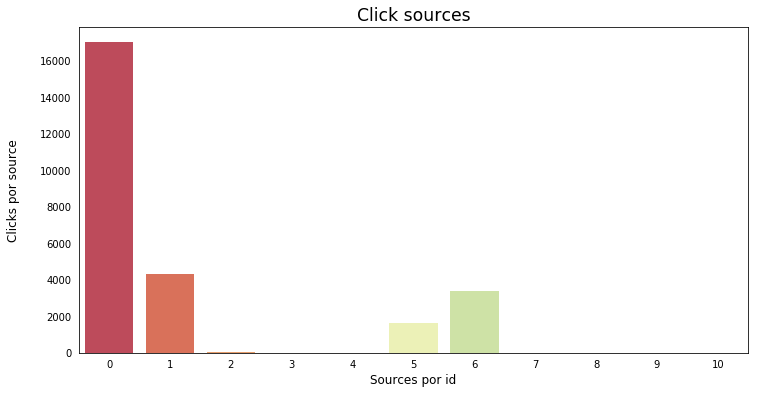

In [14]:
# Analizamos visualmente los sources
plt.figure(figsize=(12, 6))
sns.barplot(x = sources.index, y = sources.values, palette = sns.color_palette("Spectral", 10))

plt.xticks(rotation = 0, fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.title('Click sources', fontsize = 'xx-large')
plt.xlabel('Sources por id', fontsize = 'large')
plt.ylabel('Clicks por source', labelpad = 20, fontsize = 'large')
plt.show()

### Cambiamos el tipo de dato de la columna 'date' a datetime, y creamos dos nuevas columnas que contengan por separado la fecha y horario de los clicks

In [15]:
clicks['created'] = pd.to_datetime(clicks['created'])
clicks['just_date'] = pd.to_datetime(pd.to_datetime(clicks['created']).dt.date)
clicks['just_time'] = pd.to_datetime(clicks['created']).dt.time

### Analizamos los datos por fecha

In [16]:
clicks.groupby('just_date').size()

just_date
2019-03-05      31
2019-03-06      14
2019-03-07    2989
2019-03-08    2839
2019-03-09    3283
2019-03-10    3966
2019-03-11    4557
2019-03-12    5204
2019-03-13    3468
dtype: int64

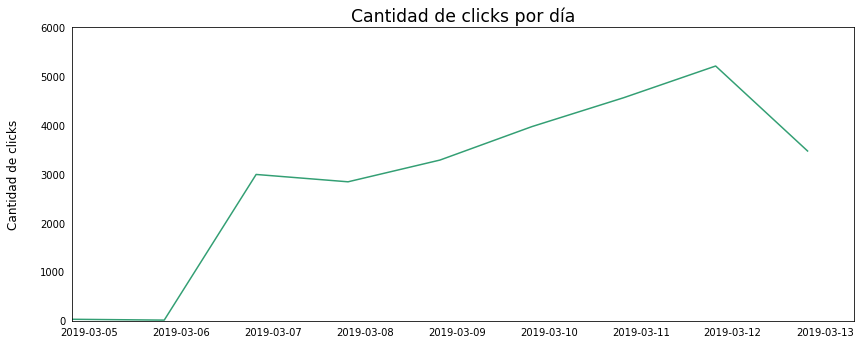

In [25]:
plt.figure(figsize=(14, 6))
clicks['just_date'].value_counts().plot(color = '#008751', alpha = 0.8)

plt.xticks(rotation = 0, ticks = [pd.to_datetime('2019-03-05 12:00:00'), pd.to_datetime('2019-03-06 12:00:00'), pd.to_datetime('2019-03-07 12:00:00'), 
                                  pd.to_datetime('2019-03-08 12:00:00'), pd.to_datetime('2019-03-09 12:00:00'), pd.to_datetime('2019-03-10 12:00:00'),
                   pd.to_datetime('2019-03-11 12:00:00'), pd.to_datetime('2019-03-12 12:00:00'), pd.to_datetime('2019-03-13 12:00:00')],
           labels = ['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08','2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13'], 
           fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de clicks', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de clicks por día', fontsize = 'xx-large')
plt.ylim(0, 6000)
plt.show()

### Por hora

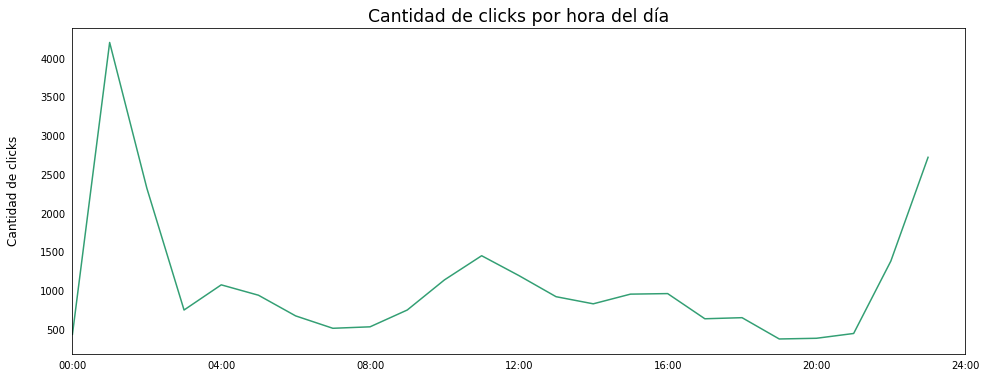

In [28]:
fig = plt.figure(figsize=(16, 6))
clicks['created'].groupby(clicks['created'].dt.hour).count().plot(kind = 'line', color = '#008751', alpha = 0.8)

plt.xticks(rotation = 0, ticks = [0, 4, 8, 12, 16, 20, 24], labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de clicks', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de clicks por hora del día', fontsize = 'xx-large')
plt.xlabel('')
plt.show()

### Continuamos el análisis de los campos de nuestro interés

In [8]:
# internal country code id
countries = clicks['country_code'].value_counts()
countries

6333597102633388268    26351
Name: country_code, dtype: int64

### Esto anterior confirma que la muestra fué tomada en un solo país, por tanto podemos enfocar nuestra atención a las ubicaciones con mayor concentración de clicks

In [9]:
# estimated lat where the click was performed
latitudes = clicks['latitude'].value_counts()
latitudes

1.205689    22949
1.218924     1105
1.235406      281
1.205393      261
1.208059      186
1.205058      171
1.223819      100
1.209520       95
1.206592       90
1.209372       83
1.209165       75
1.211090       65
1.214036       53
1.205864       47
1.206684       45
1.230641       44
1.210313       40
1.216193       33
1.207268       30
1.217111       30
1.234142       26
1.208485       24
1.209638       24
1.215060       24
1.206435       22
1.206369       21
1.209330       20
1.208551       20
1.209100       20
1.222768       20
            ...  
1.206923        8
1.207905        8
1.208795        7
1.212213        7
1.209064        6
1.212601        5
1.209883        5
1.213918        5
1.218048        5
1.205771        5
1.211060        4
1.237861        4
1.208644        4
1.205833        4
1.205746        3
1.206181        3
1.212693        3
1.205951        3
1.206259        2
1.223550        2
1.206391        2
1.213671        2
1.222527        2
1.227118        2
1.206823  

In [11]:
# estimated lon where the click was performed
longitudes = clicks['longitude'].value_counts()
longitudes

1.070234    22949
1.071209     1105
1.063737      281
1.077238      250
1.069624      186
1.077332      171
1.059475      100
1.069958       90
1.065525       85
1.067147       83
1.062330       75
1.069987       65
1.085358       53
1.071447       45
1.060085       44
1.069973       41
1.078356       40
1.068226       33
1.067693       30
1.059728       30
1.073781       26
1.064208       24
1.066156       24
1.060796       24
1.071194       22
1.069933       21
1.075605       20
1.075580       20
1.068982       20
1.072560       20
            ...  
1.071944        8
1.073021        8
1.062970        7
1.060965        7
1.068144        6
1.059288        5
1.071220        5
1.058204        5
1.061768        5
1.062037        5
1.071446        4
1.071305        4
1.068549        4
1.073223        4
1.063440        3
1.069428        3
1.071895        3
1.082651        2
1.069308        2
1.064408        2
1.081584        2
1.072806        2
1.071822        2
1.070163        2
1.070100  

### La muestra por ubicación es muy dispersa, por tanto nos concentraremos en analizar las ubicaciones con mayor concentración por medio de joins

In [12]:
# Boolean describing whether the click was performed while on a wifi network
wifi_connections = clicks['wifi_connection'].value_counts()
wifi_connections

False    26351
Name: wifi_connection, dtype: int64